## Выпускная квалификационная работа по курсу «Data Science»

In [27]:
#Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [31]:
from google.colab import files
uploaded = files.upload()

Saving X_bp.xlsx to X_bp.xlsx
Saving X_nup.xlsx to X_nup.xlsx


In [30]:
# Загрузка исходных файлов
from google.colab import drive
drive.mount('/content/drive/')#

Mounted at /content/drive/


In [28]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


In [29]:
# Определение RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [32]:
# Загрузка исходных данных из файла X_bp
X_bp = pd.read_excel('X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [33]:
# Загрузка исходных данных из файла X_nup
X_nup = pd.read_excel('X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [34]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

,X_bp признаки
0,Соотношение матрица-наполнитель
1,"Плотность, кг/м3"
2,"модуль упругости, ГПа"
3,"Количество отвердителя, м.%"
4,"Содержание эпоксидных групп,%_2"
5,"Температура вспышки, С_2"
6,"Поверхностная плотность, г/м2"
7,"Модуль упругости при растяжении, ГПа"
8,"Прочность при растяжении, МПа"
9,"Потребление смолы, г/м2"


In [35]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

,X_nup признаки
0,"Угол нашивки, град"
1,Шаг нашивки
2,Плотность нашивки


In [36]:
# Объединение датасетов, В датасете осталось 1023 строки, часть строк из таблицы X_nup была отброшена.
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

In [37]:
# Сохранение х данных
df.to_excel('data_merged.xlsx')

In [38]:
# Исследование типов данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [39]:
# Проверка на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропуски отсутствуют

In [40]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [41]:
# Описательная статистика
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

,count,mean,std,min,25%,50%,75%,max,median
Соотношение матрица-наполнитель,1023.0000,2.9304,0.9132,0.3894,2.3179,2.9069,3.5527,5.5917,2.9069
"Плотность, кг/м3",1023.0000,1975.7349,73.7292,1731.7646,1924.1555,1977.6217,2021.3744,2207.7735,1977.6217
"модуль упругости, ГПа",1023.0000,739.9232,330.2316,2.4369,500.0475,739.6643,961.8125,1911.5365,739.6643
"Количество отвердителя, м.%",1023.0000,110.5708,28.2959,17.7403,92.4435,110.5648,129.7304,198.9532,110.5648
"Содержание эпоксидных групп,%_2",1023.0000,22.2444,2.4063,14.2550,20.6080,22.2307,23.9619,33.0000,22.2307
"Температура вспышки, С_2",1023.0000,285.8822,40.9433,100.0000,259.0665,285.8968,313.0021,413.2734,285.8968
"Поверхностная плотность, г/м2",1023.0000,482.7318,281.3147,0.6037,266.8166,451.8644,693.2250,1399.5424,451.8644
"Модуль упругости при растяжении, ГПа",1023.0000,73.3286,3.1190,64.0541,71.2450,73.2688,75.3566,82.6821,73.2688
"Прочность при растяжении, МПа",1023.0000,2466.9228,485.6280,1036.8566,2135.8504,2459.5245,2767.1931,3848.4367,2459.5245
"Потребление смолы, г/м2",1023.0000,218.4231,59.7359,33.8030,179.6275,219.1989,257.4817,414.5906,219.1989


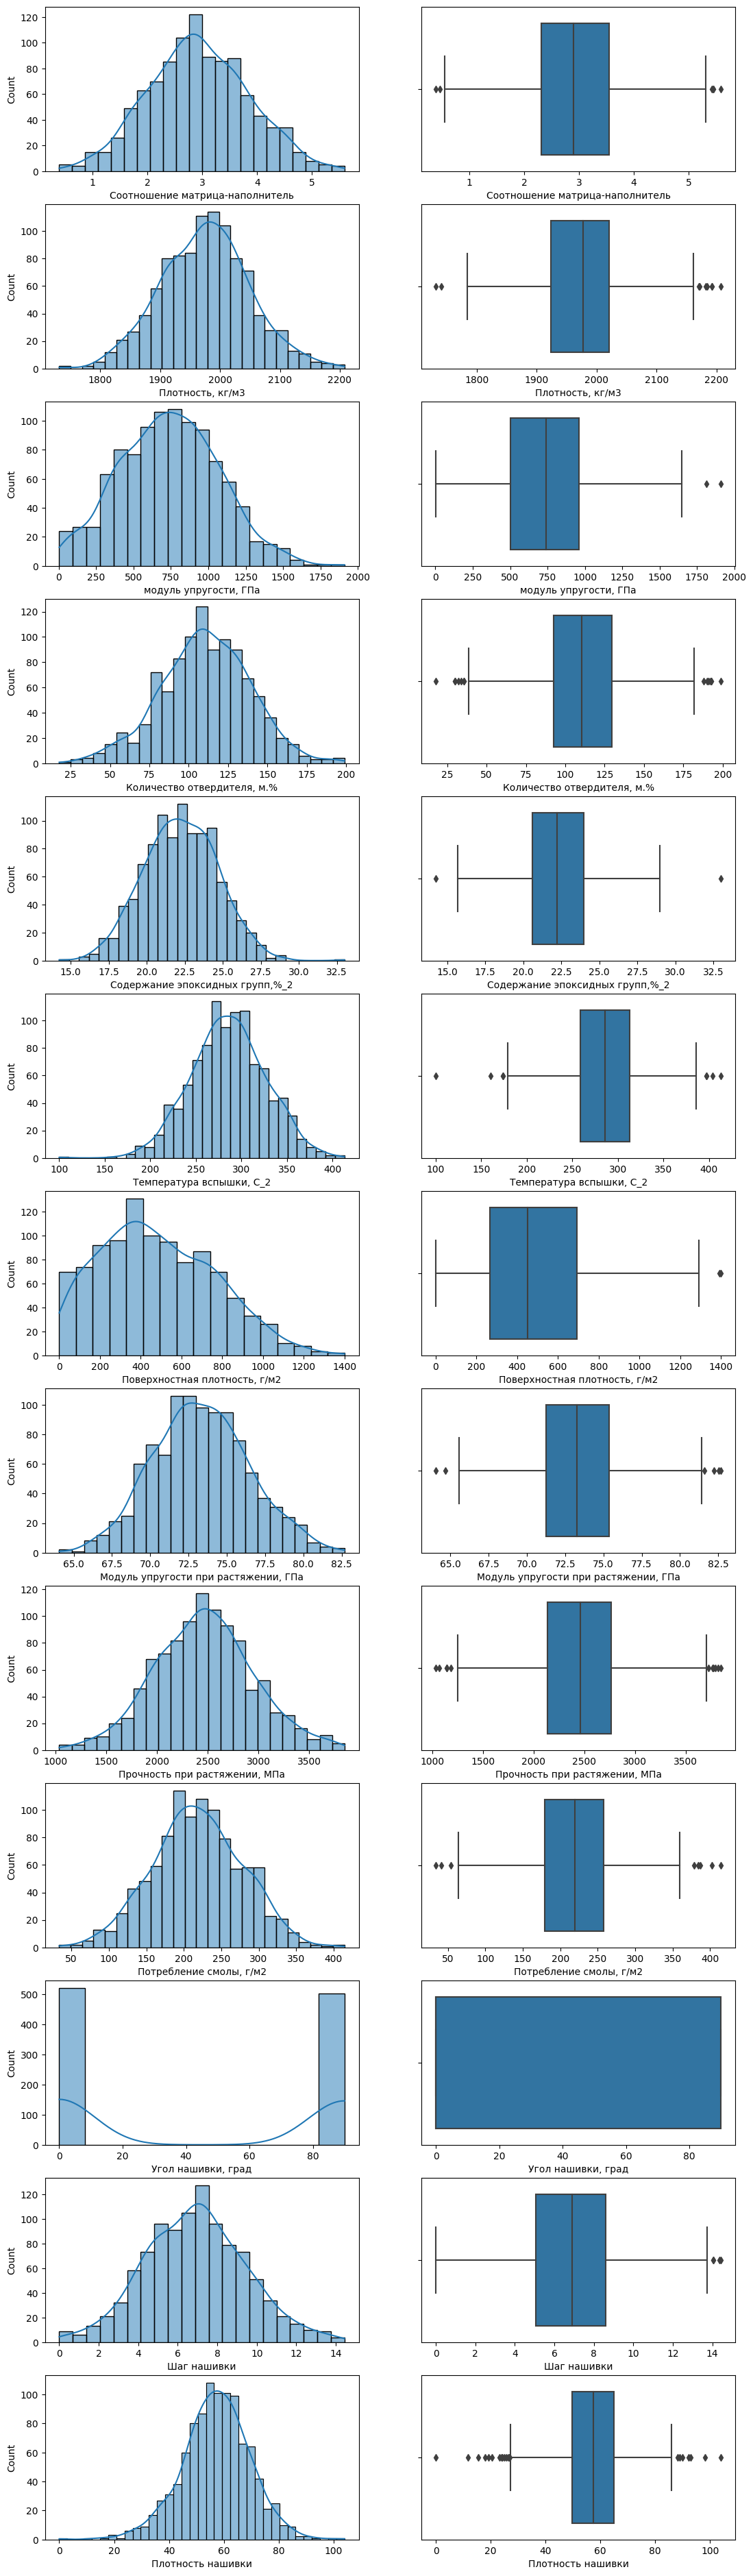

In [42]:
# Построение графиков распределения переменных и "ящиков с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Поиск выбросов
Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.



In [43]:
# Построение попарных графиков рассеяния
sns.pairplot(df, height=3);

Output hidden; open in https://colab.research.google.com to view.

По графикам видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака.

Поиск выбросов.

Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. 

Соотношение матрица-наполнитель: 3s=0 iq=6


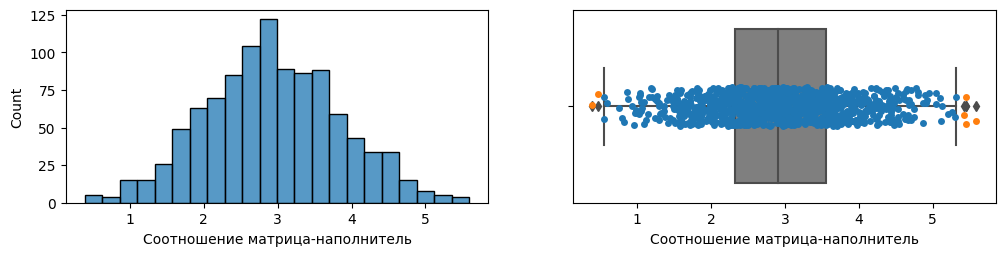

Плотность, кг/м3: 3s=3 iq=9


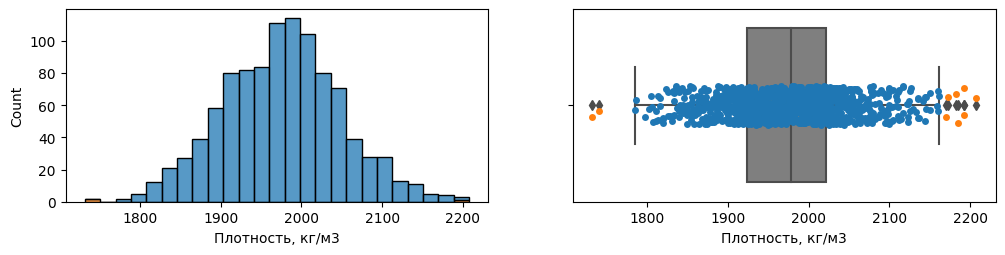

модуль упругости, ГПа: 3s=2 iq=2


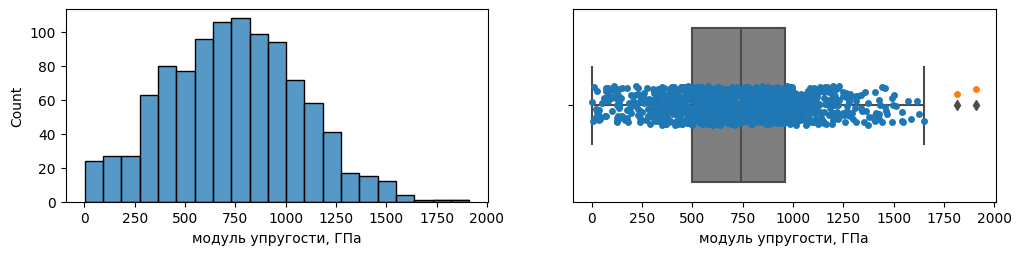

Количество отвердителя, м.%: 3s=2 iq=14


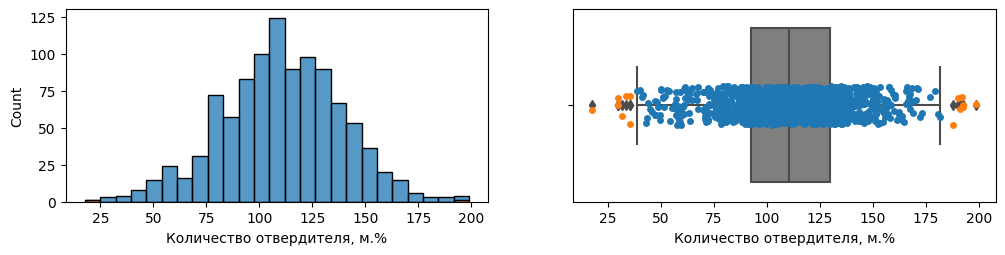

Содержание эпоксидных групп,%_2: 3s=2 iq=2


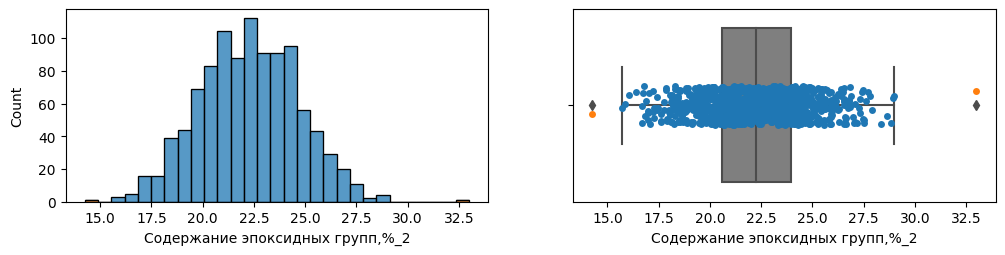

Температура вспышки, С_2: 3s=3 iq=8


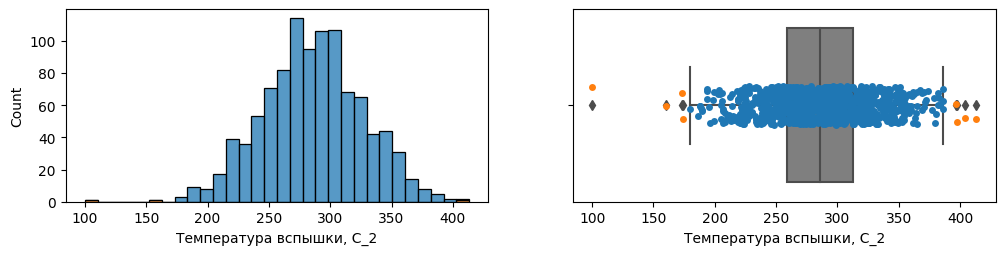

Поверхностная плотность, г/м2: 3s=2 iq=2


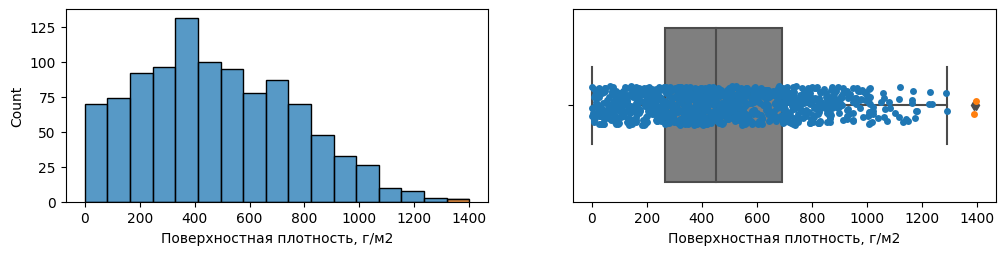

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


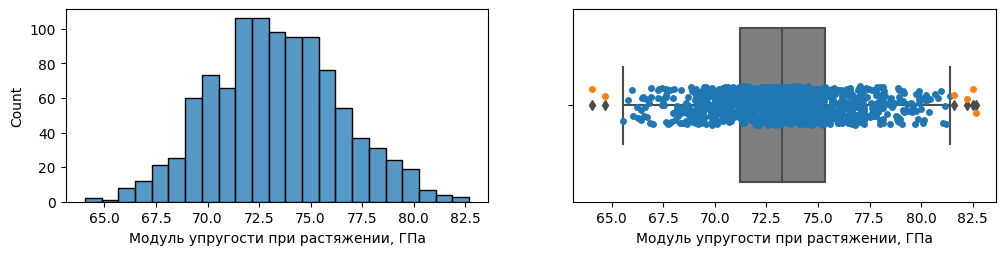

Прочность при растяжении, МПа: 3s=0 iq=11


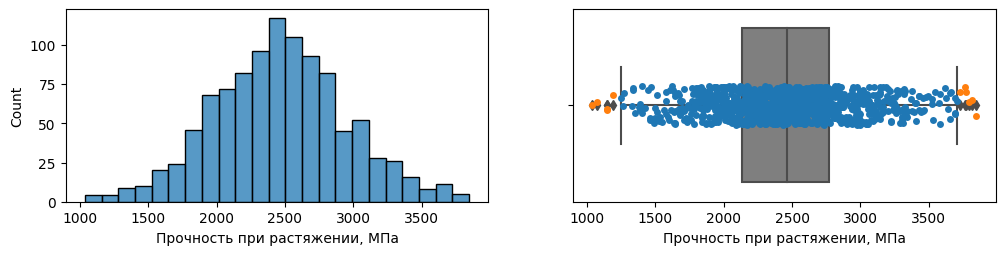

Потребление смолы, г/м2: 3s=3 iq=8


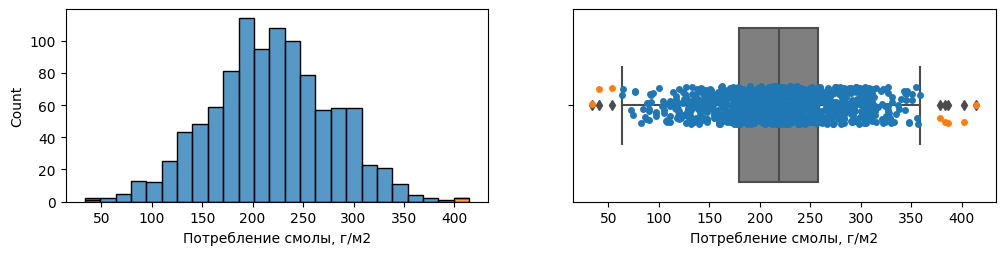

Угол нашивки, град: 3s=0 iq=0


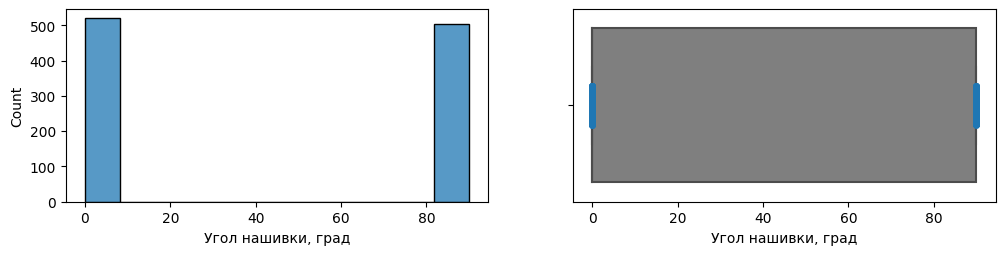

Шаг нашивки: 3s=0 iq=4


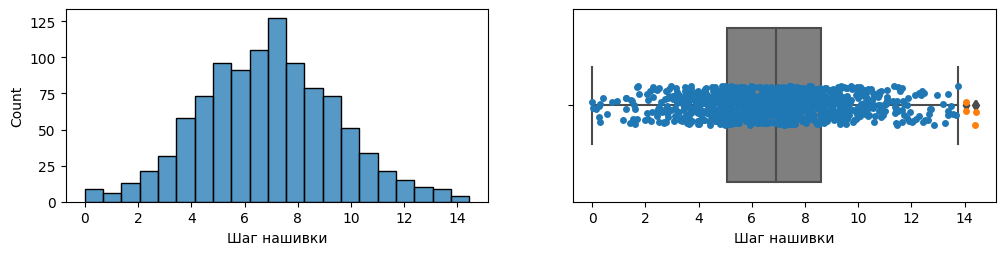

Плотность нашивки: 3s=7 iq=21


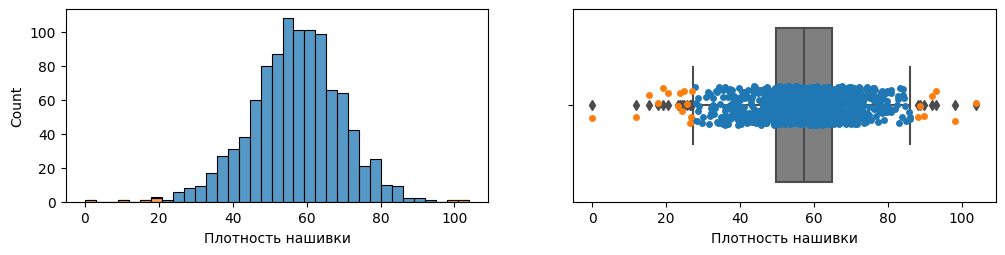

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [44]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [45]:
# Удаление выбросов методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [46]:
# Сохранение очищенных данных
df.to_excel('data_cleaned.xlsx')

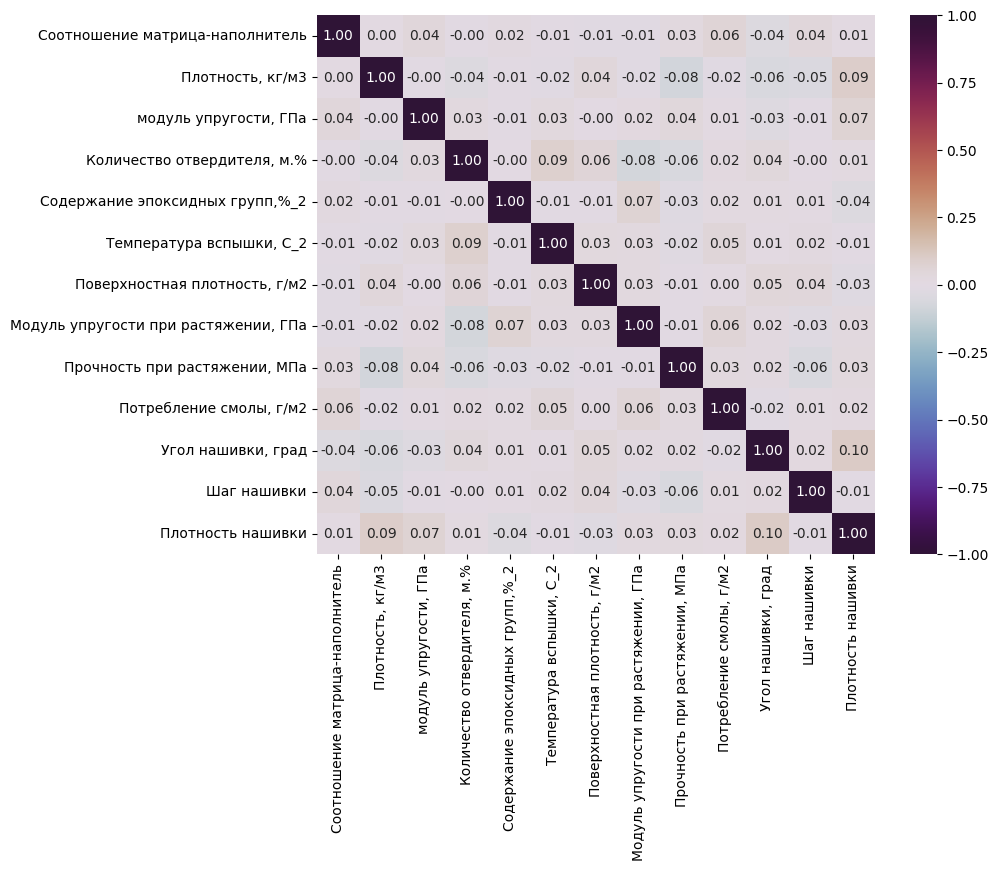

In [47]:
# Исследование матрицы корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками.

In [48]:
# Загрузка данных, подготовленных на предыдущем шаге
df = pd.read_excel('data_cleaned.xlsx', index_col=0)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


Статистическими методами зависимости не обнаружены. 

Можно предположить, что признаки делятся на:
* свойства матрицы;
* свойства наполнителя;
* свойства смеси и производственного процесса;
* свойства готового композита.

В этом случае целевые признаки имеют зависимости вида:
* модуль упругости при растяжении, Гпа (композит) = f(матрица, наполнитель, процесс);
* прочность при растяжении, МПа (композит) = f(матрица, наполнитель, процесс);
* соотношение матрица-наполнитель (процесс) = f(матрица, наполнитель, композит).

Для каждого из целевых признаков построим отдельную модель, следовательно решим 3 отдельные задачи.

In [49]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [50]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [51]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [52]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [53]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [54]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

# Предпроцессинг


In [55]:
# Разделение переменных на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [56]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [57]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [58]:
# Сравнение распределения признаков до и после обработки
# Вспомогательная функция для едиообразия отображения описательной статистики
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

# Выбор модели



In [59]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

In [60]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

In [61]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

# Модель для модуля упругости при растяжении, ГПа

In [62]:
# Разделение на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [63]:
# Препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [64]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [65]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.389403,1784.482245,4.339154,29.956150,15.881668,173.484920,1.668002,41.048278,0.000000,0.145034,20.571633
max,5.455566,2192.297637,1628.000000,192.851702,28.955094,403.652861,1291.340115,383.663401,90.000000,14.440522,89.876616
mean,2.907441,1972.568298,743.180523,110.927781,22.237431,286.158802,482.049370,218.246969,43.457143,6.890381,57.664603
std,0.908368,70.846531,326.626902,27.485979,2.347655,39.974223,273.399143,59.487795,45.005702,2.536808,11.880191


In [69]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
min,-2.774030,-2.656736,-2.263652,-2.948031,-2.709217,-2.820679,-1.758326,-2.980870,-2.660891,-3.124486,0.000000
max,2.807176,3.103701,2.710898,2.982703,2.863482,2.941347,2.962224,2.782667,2.978364,2.713344,1.000000
mean,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.482857
std,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,0.500063


In [71]:
# Описательная статистика выходной переменной
#show_statistics(y1_train)

In [70]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.021502,-3.059339,-2.465060,-0.033641,-8.053111
LinearRegression,-0.022620,-3.059379,-2.464305,-0.033641,-8.139731
Ridge,-0.022538,-3.059264,-2.464226,-0.033640,-8.139352
Lasso,-0.021502,-3.059339,-2.465060,-0.033641,-8.053111
SVR,-0.037763,-3.082058,-2.472179,-0.033767,-8.146369
KNeighborsRegressor,-0.197298,-3.312241,-2.624624,-0.035795,-8.876770
DecisionTreeRegressor,-1.229594,-4.485293,-3.545377,-0.048431,-12.178495
RandomForestRegressor,-0.061516,-3.117096,-2.485271,-0.033934,-8.457280


In [73]:
# Поиску лучших моделей
s_models1 = {}

In [169]:
# Подбор параметров для модели Ridge

In [75]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
239,"{'alpha': 480, 'solver': 'sparse_cg'}",-2.455538,1


In [81]:
#Подбор параметров для модели Lasso

#alpha, default=1.0
#Constant that multiplies the L1 term.

In [82]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
6,{'alpha': 0.15},-2.459921,1


In [170]:
# Подбор параметров для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [84]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
3,"{'C': 0.015, 'kernel': 'linear'}",-2.456808,1


In [85]:
#Подобор параметров для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.# 

In [86]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
11,{'n_neighbors': 25},-2.461113,1


In [87]:
# Подбор параметров для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [88]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
159,"{'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 10, 'random_state': 3128, 'splitter': 'random'}",-2.43505,1


In [89]:
# Подбор параметров для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [90]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

,params,MAE,rank
8,"{'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'random_state': 3128}",-2.457202,10


In [91]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
"Ridge(alpha=480, solver='sparse_cg')",-0.013309,-3.046636,-2.455538,-0.033517,-8.071898
Lasso(alpha=0.15),-0.019048,-3.055423,-2.459921,-0.033574,-8.102101
"SVR(C=0.015, kernel='linear')",-0.016521,-3.052020,-2.456808,-0.033549,-8.140634
KNeighborsRegressor(n_neighbors=25),-0.030786,-3.074728,-2.461113,-0.033581,-8.031419
"DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=3128, splitter='random')",-0.009281,-3.041407,-2.435050,-0.033185,-8.004156
"RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=4, max_features=2, random_state=3128)",-0.015396,-3.049810,-2.446070,-0.033369,-8.275716


In [92]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [93]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

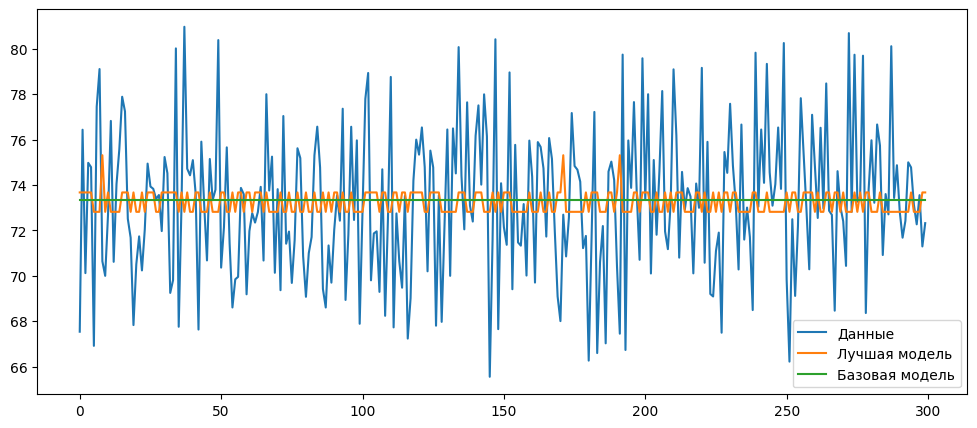

In [94]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [95]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

<ipython-input-95-6daa562fd97f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))


,R2,RMSE,MAE,MAPE,max_error
Базовая модель,-0.001377,-3.222954,-2.577796,-0.035319,-7.800690
Лучшая модель (дерево решений),-0.035776,-3.277844,-2.610243,-0.035707,-8.152045


# Модель для прочности при растяжении, МПа

In [96]:
# Разделение на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [ ]:
# Препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [ ]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [100]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.389403,1784.482245,4.339154,29.956150,15.881668,173.484920,1.668002,41.048278,0.000000,0.145034,20.571633
max,5.455566,2192.297637,1628.000000,192.851702,28.955094,403.652861,1291.340115,383.663401,90.000000,14.440522,89.876616
mean,2.907441,1972.568298,743.180523,110.927781,22.237431,286.158802,482.049370,218.246969,43.457143,6.890381,57.664603
std,0.908368,70.846531,326.626902,27.485979,2.347655,39.974223,273.399143,59.487795,45.005702,2.536808,11.880191


In [101]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
min,-2.774030,-2.656736,-2.263652,-2.948031,-2.709217,-2.820679,-1.758326,-2.980870,-2.660891,-3.124486,0.000000
max,2.807176,3.103701,2.710898,2.982703,2.863482,2.941347,2.962224,2.782667,2.978364,2.713344,1.000000
mean,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.482857
std,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,1.000715,0.500063


In [ ]:
# Описательная статистика выходной переменной
show_statistics(y1_train)

In [173]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.021502,-3.059339,-2.465060,-0.033641,-8.053111
LinearRegression,-0.022620,-3.059379,-2.464305,-0.033641,-8.139731
Ridge,-0.022538,-3.059264,-2.464226,-0.033640,-8.139352
Lasso,-0.021502,-3.059339,-2.465060,-0.033641,-8.053111
SVR,-0.037763,-3.082058,-2.472179,-0.033767,-8.146369
KNeighborsRegressor,-0.197298,-3.312241,-2.624624,-0.035795,-8.876770
DecisionTreeRegressor,-1.229594,-4.485293,-3.545377,-0.048431,-12.178495
RandomForestRegressor,-0.061516,-3.117096,-2.485271,-0.033934,-8.457280


Ни одна из выбранных мной моделей не оказалась подходящей для исходных данных.

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [105]:
# Поиск лучших моделей
s_models1 = {}

In [106]:
# Подбор параметров для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [107]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
239,"{'alpha': 480, 'solver': 'sparse_cg'}",-2.455538,1


In [108]:
# Подбор параметров для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [109]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
6,{'alpha': 0.15},-2.459921,1


In [110]:
# Подбор  параметров для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [111]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
3,"{'C': 0.015, 'kernel': 'linear'}",-2.456808,1


In [112]:
# Подбор параметров для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [113]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
11,{'n_neighbors': 25},-2.461113,1


In [114]:
# Подбор параметров для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [115]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

,params,MAE,rank
159,"{'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 10, 'random_state': 3128, 'splitter': 'random'}",-2.43505,1


In [116]:
# Подбор параметров для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [117]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

,params,MAE,rank
8,"{'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'random_state': 3128}",-2.457202,10


In [118]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
"Ridge(alpha=480, solver='sparse_cg')",-0.013309,-3.046636,-2.455538,-0.033517,-8.071898
Lasso(alpha=0.15),-0.019048,-3.055423,-2.459921,-0.033574,-8.102101
"SVR(C=0.015, kernel='linear')",-0.016521,-3.052020,-2.456808,-0.033549,-8.140634
KNeighborsRegressor(n_neighbors=25),-0.030786,-3.074728,-2.461113,-0.033581,-8.031419
"DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=3128, splitter='random')",-0.009281,-3.041407,-2.435050,-0.033185,-8.004156
"RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=4, max_features=2, random_state=3128)",-0.015396,-3.049810,-2.446070,-0.033369,-8.275716


Таким образом, подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели.

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.



# Модель для соотношения матрица-наполнитель

In [119]:
# Разделение на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [120]:
# Препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [121]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [122]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,1784.482245,4.339154,29.956150,15.881668,173.484920,1.668002,64.054061,1071.123751,41.048278,0.000000,0.145034,20.571633
max,2192.297637,1628.000000,192.851702,28.955094,403.652861,1291.340115,82.682051,3848.436732,383.663401,90.000000,14.440522,89.876616
mean,1972.568298,743.180523,110.927781,22.237431,286.158802,482.049370,73.354026,2468.178562,218.246969,43.457143,6.890381,57.664603
std,70.846531,326.626902,27.485979,2.347655,39.974223,273.399143,3.066086,487.297434,59.487795,45.005702,2.536808,11.880191


In [123]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
min,-2.557447,-2.197166,-2.804896,-2.573362,-2.743752,-1.645837,-2.850424,-2.890122,-3.073555,-2.614982,-3.055713,0.000000
max,2.722504,2.731448,2.862586,2.725119,2.894742,2.841009,2.933340,2.901172,2.868402,2.872154,2.860053,1.000000
mean,-0.122313,0.045583,0.012279,0.002542,0.016454,0.025438,0.037102,0.023037,-0.000407,-0.025869,0.110485,0.482857
std,0.917244,0.991474,0.956296,0.951472,0.979261,0.951172,0.951982,1.016120,1.031694,0.973721,1.014075,0.500063


Попробую модель MLPRegressor из библиотеки sklearn.

In [128]:
# Настройка нейросети
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

NameError: ignored

In [ ]:
%%time
# Запуск нейросети
model3_1.fit(x3_train, y3_train)

In [130]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

NameError: ignored

In [ ]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

NameError: ignored

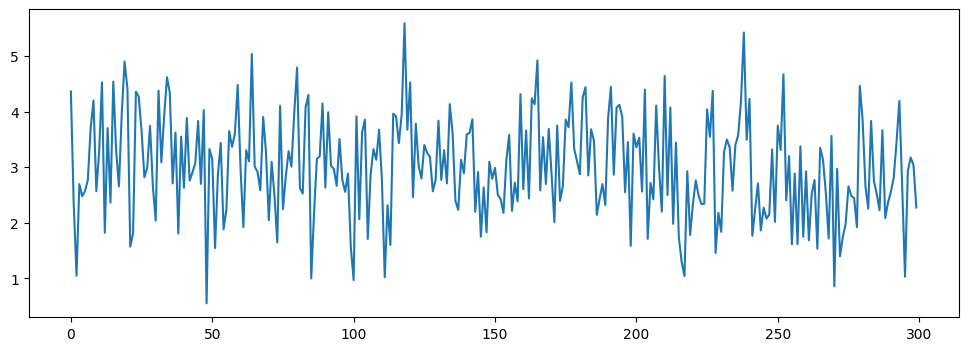

In [175]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [134]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

NameError: ignored

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка по всем метрикам значительно хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

In [135]:
# Построение нейронной сети с помощью библиотеки TensorFlow.


In [136]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [137]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [138]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [139]:
# Сборка нейросети
model3_2 = construct_model()

In [140]:
# Компиляция нейросети
model3_2 = compile_model(model3_2)

In [141]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)                6

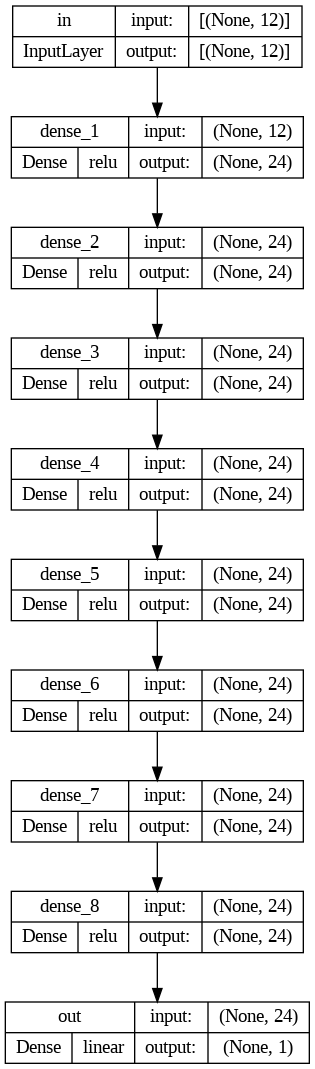

In [142]:
# Архитектура нейросети визуально
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [143]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 2s 28ms/step - loss: 88.2230 - root_mean_squared_error: 2.7677 - val_loss: 70.1811 - val_root_mean_squared_error: 2.3317
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 48.0630 - root_mean_squared_error: 1.7086 - val_loss: 37.4077 - val_root_mean_squared_error: 1.2184
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 37.7862 - root_mean_squared_error: 1.2422 - val_loss: 34.6999 - val_root_mean_squared_error: 1.3180
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 34.8455 - root_mean_squared_error: 1.2499 - val_loss: 31.4011 - val_root_mean_squared_error: 1.0792
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 33.4017 - root_mean_squared_error: 1.0661 - val_loss: 30.9028 - val_root_mean_squared_error: 1.1571
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 33.9247 - root_mean_squared_error: 1.2375 - val_loss: 30.1906 - val

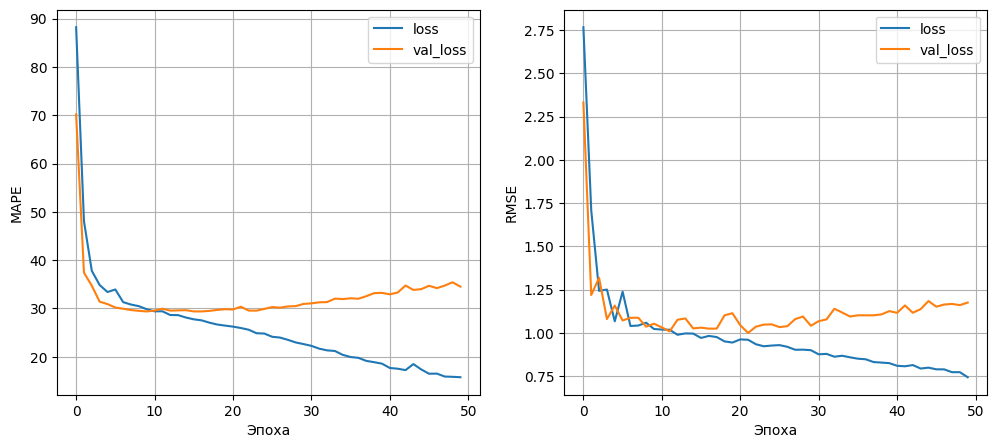

In [144]:
plot_loss(history.history)

In [145]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 35.7757 - root_mean_squared_error: 1.1889


[35.77571105957031, 1.188907504081726]

In [146]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 2ms/step


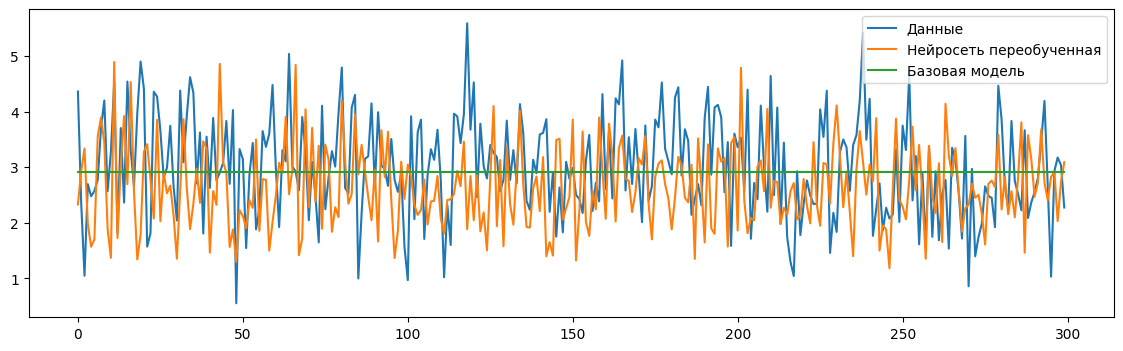

In [147]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [148]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [149]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 2s 17ms/step - loss: 95.7639 - root_mean_squared_error: 2.9311 - val_loss: 88.5768 - val_root_mean_squared_error: 2.7891
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 71.9444 - root_mean_squared_error: 2.3717 - val_loss: 42.1984 - val_root_mean_squared_error: 1.5931
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 38.5481 - root_mean_squared_error: 1.2059 - val_loss: 33.2031 - val_root_mean_squared_error: 1.1671
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 34.9014 - root_mean_squared_error: 1.2243 - val_loss: 32.8086 - val_root_mean_squared_error: 1.1486
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 32.9430 - root_mean_squared_error: 1.0919 - val_loss: 32.2860 - val_root_mean_squared_error: 1.1044
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 32.3527 - root_mean_squared_error: 1.0728 - val_loss: 32.4410 - val

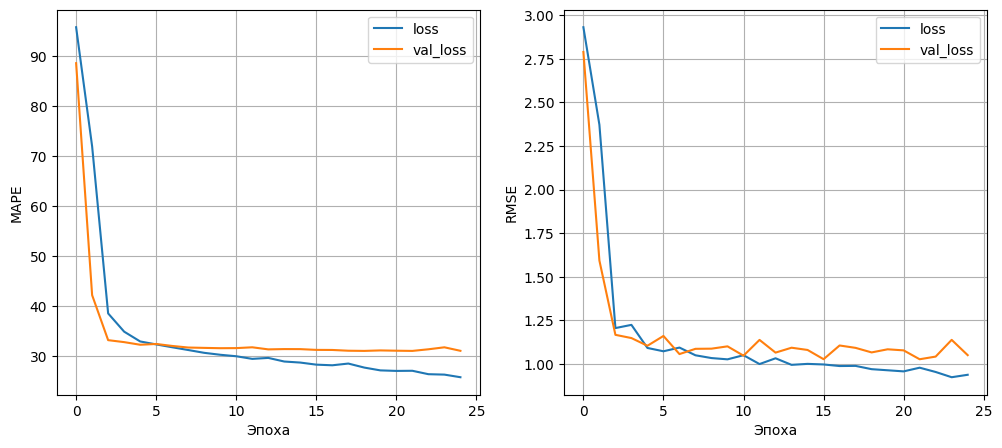

In [150]:
plot_loss(history.history)

In [151]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 3ms/step - loss: 31.7935 - root_mean_squared_error: 1.0809


[31.793521881103516, 1.0809433460235596]

In [152]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 2ms/step


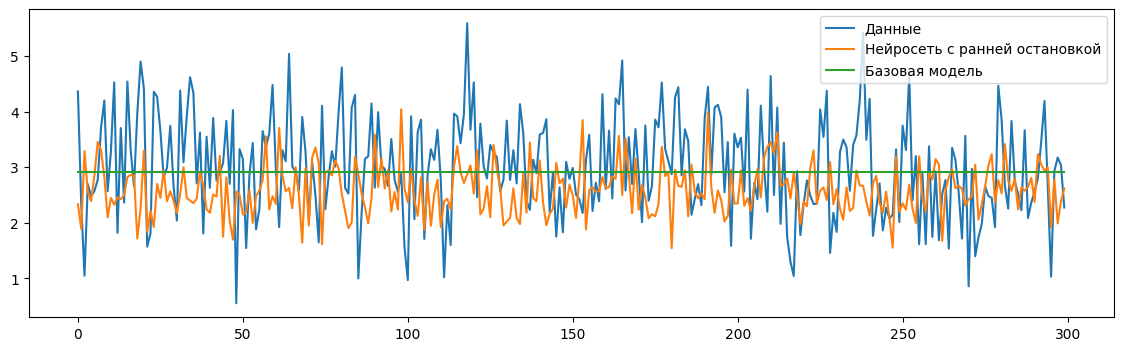

In [153]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [154]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [155]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [156]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [157]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 2s 20ms/step - loss: 91.2981 - root_mean_squared_error: 2.8345 - val_loss: 76.4639 - val_root_mean_squared_error: 2.4898
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 55.3637 - root_mean_squared_error: 1.9278 - val_loss: 33.2295 - val_root_mean_squared_error: 1.1458
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 40.9197 - root_mean_squared_error: 1.3048 - val_loss: 32.2347 - val_root_mean_squared_error: 1.1922
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 37.8452 - root_mean_squared_error: 1.3387 - val_loss: 32.6019 - val_root_mean_squared_error: 1.2400
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 37.9293 - root_mean_squared_error: 1.2776 - val_loss: 31.4823 - val_root_mean_squared_error: 1.1510
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 36.0530 - root_mean_squared_error: 1.2195 - val_loss: 31.9913 - val

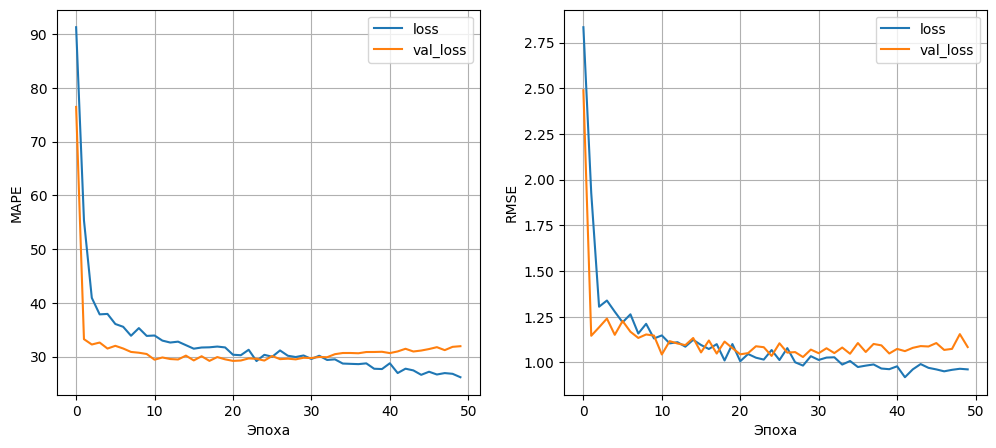

In [158]:
plot_loss(history.history)

In [159]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 31.2918 - root_mean_squared_error: 1.0609


[31.291757583618164, 1.0609246492385864]

In [160]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

10/10 [==============================] - 0s 3ms/step


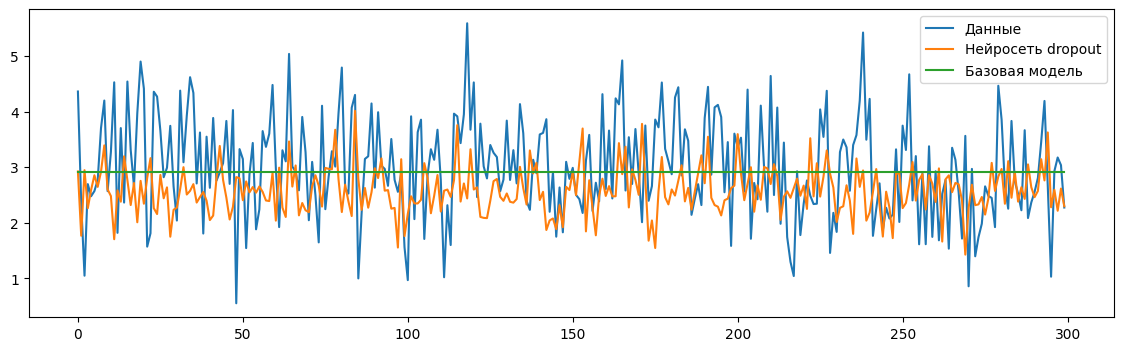

In [161]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [162]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

<ipython-input-162-78960c5a1527>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
<ipython-input-162-78960c5a1527>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
<ipython-input-162-78960c5a1527>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))


,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.011269,-0.911261,-0.737067,-0.299795,-2.684301
Нейросеть переобученная,-0.721383,-1.188907,-0.977193,-0.357757,-3.706656
Нейросеть с ранней остановкой,-0.422942,-1.080943,-0.873433,-0.317935,-2.759532
Нейросеть dropout,-0.370726,-1.060925,-0.860477,-0.312918,-3.152820


# Оценка точности модели на тренировочном и тестовом датасете

In [163]:
## Модель для модуля упругости при растяжении
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=3128, splitter='random')

In [164]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

,R2,RMSE,MAE,MAPE,max_error
"Модуль упругости, тренировочный",0.017295,-3.037284,-2.410294,-0.032850,-9.008468
"Модуль упругости, тестовый",-0.035776,-3.277844,-2.610243,-0.035707,-8.152045


Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом

In [ ]:
# Модель для прочности при растяжении
best_model2


In [ ]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

Градиентный бустинг - это метод, который показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.